# Tarea 4: Recursión

**Instrucciones**

+ Responda las siguientes preguntas según el enunciado de cada una. 

+ Al terminar guarde su archivo con los apellidos de cada uno en el grupo separados por el símbolo _ por ejemplo: **apellido1_apellido2.jpynb**. 

+ Envíe la tarea al correo: german.combariza@uexternado.edu.co antes de las 11:59pm de la fecha dada. Tareas enviadas después de la hora no se reciben.

+ **Secciones:**
Para esta tarea ud puede consultas las siguientes secciones del libro: 
 Seccion 1.7 de: http://composingprograms.com/

+ Usted puede trabajar en grupo, pero por favor cada uno escriba sus propias solucinoes, **la copia será tratada de acuerdo al reglamento estudiantil**.  

**Pregunta 1**: Números Ochos:

Escriba una función recursiva num_eights que tome un entero positivo pos y devuelva el número de veces que aparece el dígito 8 en pos.

Importante: Use recursión!

In [96]:
def num_eights(pos):
    """Returns the number of times 8 appears as a digit of pos.

    >>> num_eights(3)
    0
    >>> num_eights(8)
    1
    >>> num_eights(88888888)
    8
    >>> num_eights(2638)
    1
    >>> num_eights(86380)
    2
    >>> num_eights(12345)
    0
    >>> from construct_check import check
    >>> # ban all assignment statements
    >>> check(HW_SOURCE_FILE, 'num_eights',
    ...       ['Assign', 'AnnAssign', 'AugAssign', 'NamedExpr'])
    True
    """
    if(pos%10==8): return num_eights(pos//10) + 1
    elif(pos<10): return 0
    else: return num_eights(pos//10) + 0


**Pregunta 2:** Ping pong

La secuencia de ping-pong cuenta desde 1 y siempre cuenta hacia adelante o hacia atrás. En el elemento k, la dirección cambia si k es un múltiplo de 8 o contiene el dígito 8. Los primeros 30 elementos de la secuencia de ping-pong se enumeran a continuación, con cambios de dirección marcados con corchetes en el 8, 16, 18, 24, y 28 elementos:

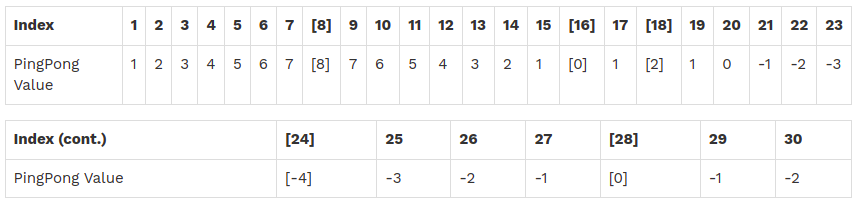

Implemente una función pingpong que devuelva el enésimo elemento de la secuencia de ping-pong sin usar ninguna instrucción de asignación. (Se le permite usar definiciones de funciones).

Puede usar la función num_eights, que definió en la pregunta anterior.

Importante: use recursión!

In [97]:
def pingpong(n):
    """Return the nth element of the ping-pong sequence.

    >>> pingpong(8)
    8
    >>> pingpong(10)
    6
    >>> pingpong(15)
    1
    >>> pingpong(21)
    -1
    >>> pingpong(22)
    -2
    >>> pingpong(30)
    -2
    >>> pingpong(68)
    0
    >>> pingpong(69)
    -1
    >>> pingpong(80)
    0
    >>> pingpong(81)
    1
    >>> pingpong(82)
    0
    >>> pingpong(100)
    -6
    >>> from construct_check import check
    >>> # ban assignment statements
    >>> check(HW_SOURCE_FILE, 'pingpong',
    ...       ['Assign', 'AnnAssign', 'AugAssign', 'NamedExpr'])
    True
    """
    if(n<=8): return n
    elif(num_eights(n) or n%8==0): return ( pingpong(n-1)  + (-1**num_eights(n)) ) * (-1**num_eights(n))
    else: return pingpong(n-1) -1**num_eights(n)


**Pregunta 3:**Dígitos faltantes

Escriba la función recursiva missing_digits que toma un número n que está ordenado en orden no decreciente (por ejemplo, 12289 es válido pero 15362 y 98764 no lo son). Devuelve el número de dígitos que faltan en n. Un dígito faltante es un número entre el primero y el último dígito de n de a que no está en n.

Importante: Utilice la recursividad; las pruebas fallarán si usa algún bucle.

In [98]:
def missing_digits(n):
    """Given a number a that is in sorted, non-decreasing order,
    return the number of missing digits in n. A missing digit is
    a number between the first and last digit of a that is not in n.
    >>> missing_digits(1248) # 3, 5, 6, 7
    4
    >>> missing_digits(19) # 2, 3, 4, 5, 6, 7, 8
    7
    >>> missing_digits(1122) # No missing numbers
    0
    >>> missing_digits(123456) # No missing numbers
    0
    >>> missing_digits(3558) # 4, 6, 7
    3
    >>> missing_digits(35578) # 4, 6
    2
    >>> missing_digits(12456) # 3
    1
    >>> missing_digits(16789) # 2, 3, 4, 5
    4
    >>> missing_digits(4) # No missing numbers between 4 and 4
    0
    >>> from construct_check import check
    >>> # ban while or for loops
    >>> check(HW_SOURCE_FILE, 'missing_digits', ['While', 'For'])
    True
    """
    if n < 10:
        return 0
    elif ((n//10)%10) + 1 == n%10 or ((n//10)%10)  == n%10:
        return (missing_digits(n//10)) + 0
    elif ((n//10)%10) + 1 < n%10:
        return missing_digits(n-1) + 1
    return 0


**Pregunta 4:**

Un cambio (o vueltas) es un entero positivo que es un conjunto de monedas a dar por cambio si la suma de los valores de las monedas es corresponde. Aquí usaremos valores estándar de monedas de EE. UU.: 1, 5, 10, 25. Por ejemplo, los siguientes conjuntos dan cambio por 15:

+ 15 monedas de 1 centavo
+ 10 monedas de 1 centavo, 1 de 5 centavos
+ 5 monedas de 1 centavo, 2 de 5 centavos
+ 5 monedas de 1 centavo, 1 de 10 centavos
+ 3 monedas de 5 centavos
+ 1 moneda de 5 centavos, 1 de 10 centavos

Por lo tanto, hay 6 formas de dar cambio por 15. Escriba una función recursiva `count_coins` que tome un entero positivo y devuelva el número de formas de dar cambio por cambio usando monedas de EE. UU.

Puede usar cualquiera de las funciones que se le han dado a continuación:

+ `ascending_coin` devolverá la siguiente denominación de moneda más grande de la entrada, es decir, moneda_ascendente(5) es 10.
+ `descending_coin` devolverá la siguiente denominación de moneda más pequeña de la entrada, es decir, descending_coin(5) es 1.

Hay dos formas principales en las que puede abordar este problema. Una forma usa moneda_ascendente y otra usa moneda_descendente.

Importante: Utilice la recursividad; las pruebas fallarán si usa bucles.

In [99]:
def ascending_coin(coin):
    """Returns the next ascending coin in order.
    >>> ascending_coin(1)
    5
    >>> ascending_coin(5)
    10
    >>> ascending_coin(10)
    25
    >>> ascending_coin(2) # Other values return None
    """
    if coin == 1:
        return 5
    elif coin == 5:
        return 10
    elif coin == 10:
        return 25

def descending_coin(coin):
    """Returns the next descending coin in order.
    >>> descending_coin(25)
    10
    >>> descending_coin(10)
    5
    >>> descending_coin(5)
    1
    >>> descending_coin(2) # Other values return None
    """
    if coin == 25:
        return 10
    elif coin == 10:
        return 5
    elif coin == 5:
        return 1

def count_coins(change):
    """Return the number of ways to make change using coins of value of 1, 5, 10, 25.
    >>> count_coins(15)
    6
    >>> count_coins(10)
    4
    >>> count_coins(20)
    9
    >>> count_coins(100) # How many ways to make change for a dollar?
    242
    >>> count_coins(200)
    1463
    >>> from construct_check import check
    >>> # ban iteration
    >>> check(HW_SOURCE_FILE, 'count_coins', ['While', 'For'])
    True
    """
    def cambio(change, valor = 1):
        
        if change == 0: return 1 
        elif change < 0: return 0
        elif valor == 25: return cambio(change-valor, valor) 
        else:
            return cambio(change, ascending_coin(valor)) + cambio(change-valor, valor)
    return cambio(change)